# "Central Tendency": Mean, Mode, Median

Let's generate a few distributions and calculate the mean, mode, median for each.
Start by importing the relevant libraries

In [1]:
from math import *
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

Let's generate a distribution we would get from throwing a (fair) die

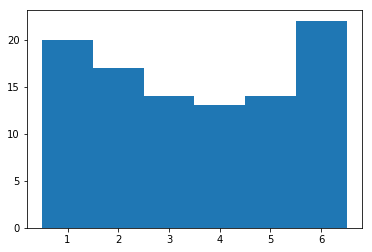

In [2]:
#Return a sample of 100 random numbers between 0 and 1
sampleSize=100
flatRandom = np.random.random(sampleSize) 
#turn it into integers from 1 to 6:
diceRandom1 = [int(x*6)+1 for x in flatRandom]
h=plt.hist(diceRandom1, 6, range=(0.5, 6.5)) # make histogram
plt.show()

Calulate arithmetic mean:

In [3]:
sum=0
for x in diceRandom1:
    sum += x
N=len(diceRandom1) # N = the number of data points in the array "numbers"
mean = sum/N
print("The mean is ", mean)

The mean is  3.5


This is close to 3.5, as expected. In what way this is far away from the expected value of exactly zero is something we will discuss also in this course, when we estimate the uncertainty on the mean. But for now, we are happy to have successfully calculated the mean of a dataset.

Let's now calculate the median.

In [4]:
# sort the numbers:
diceRandom1.sort()
# print sorted values, if there aren't too many
if len(diceRandom1) < 101: print(diceRandom1)
#calcualate median
# distinguish case where sample length is odd (we take the value of the mid point)
# as in {1, 2, 3} => median 2
# and where it is even (take the average of the two midpoints)
# as in {1, 2, 3, 4} => median 2.5
mp = int((len(diceRandom1)+1)/2)
median = diceRandom1[mp]
if len(diceRandom1)%2 == 0: 
    median = 0.5*(median + diceRandom1[mp+1])

print("Median = ", median)


[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]
Median =  3.5


Now the mode:

In [5]:
frequency={1:0, 2:0, 3:0, 4:0, 5:0, 6:0}  # a python "dictionary", like C++ STL map
for x in diceRandom1:
    frequency[x] += 1
print(frequency.items())

max=-1
mode=-1
for xy in frequency.items():
    if(xy[1] > max):
        max = xy[1]
        mode = xy[0]

print("Mode is ", mode)

dict_items([(1, 20), (2, 17), (3, 14), (4, 13), (5, 14), (6, 22)])
Mode is  6


Of course for this distribution, the mode is equally likely to be 1, 2, 3, 4, 5 or 6, because each of these values is equally likely to have the largest number of events.

## Mean, Median, Mode for 2 dice

Let's do the same thing for two dice

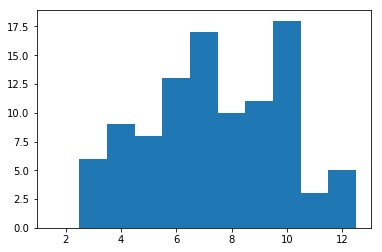

In [6]:
#Return a sample of random numbers between 0 and 1
# (use same default sample size as above)
flatRandom1st = np.random.random(sampleSize) 
flatRandom2nd = np.random.random(sampleSize) 
#turn it into integers from 1 to 6:
diceRandom1st = [int(x*6)+1 for x in flatRandom1st]
diceRandom2nd = [int(x*6)+1 for x in flatRandom2nd]
diceRandom2 = [x[0]+x[1] for x in zip(diceRandom1st,diceRandom2nd)]
h=plt.hist(diceRandom2, 11, range=(1.5, 12.5)) # make histogram
plt.show()

In [7]:
sum=0
for x in diceRandom2:
    sum += x
N=len(diceRandom2) # N = the number of data points in the array "numbers"
mean = sum/N
print("Mean = ", mean)
median = sorted(diceRandom2)[int(len(diceRandom2)/2)]
print("Median = ", median)

frequency={2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0, 10:0, 11:0, 12:0}
for x in diceRandom2:
    frequency[x] += 1
print(frequency.items())

max=-1
mode=-1
for xy in frequency.items():
    if(xy[1] > max):
        max = xy[1]
        mode = xy[0]

print("Mode is ", mode)

Mean =  7.43
Median =  7
dict_items([(2, 0), (3, 6), (4, 9), (5, 8), (6, 13), (7, 17), (8, 10), (9, 11), (10, 18), (11, 3), (12, 5)])
Mode is  10


## Mean, median mode for Gaussian

We can try this with continuous distributions, too. Let's try a "standard normal", a Gaussian "bell curve" of width one and mean zero; we will discuss this distribution in detail, later in the course

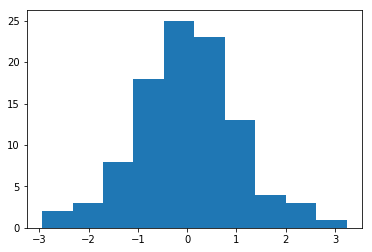

In [15]:
#Return a sample of numbers from “standard normal” (mean 0, sigma 1) distribution.
randomGauss = np.random.randn(sampleSize) 
nbins = int(len(randomGauss)/10) # base number of bins based on sample size...
if nbins > 100: nbins=100  #... but within some...
if nbins < 5: nbins=5      #... sensible limits.
h=plt.hist(randomGauss, nbins) # make histogram with nbins bins
plt.show()

In [9]:
sum=0
for x in randomGauss:
    sum += x
N=len(randomGauss) # N = the number of data points in the array "numbers"
mean = sum/N
print("Mean = ", mean)
median = sorted(randomGauss)[int(len(randomGauss)/2)]
print("Median = ", median)
#(note that calculating the mode makes no sense in a continuously distributed variable
# although you could quite sensibly calculate the mode of the histogram we make of it;
# won't do that here, though)

Mean =  0.0241069170343
Median =  -0.00597740948639


# Variance and Standard Deviation

For the dice:

In [10]:
sum=0
sumsq=0
for x in diceRandom1:
    sum   += x
    sumsq += x**2
N = len(diceRandom1)
mean   = sum/N
meansq = sumsq/N
Variance = meansq - mean**2
StandardDeviation = sqrt(Variance)
print("Variance for 1 die = ", Variance, ", standard deviation = ", StandardDeviation)

Variance for 1 die =  3.3900000000000006 , standard deviation =  1.8411952639521971


For the two dice:

In [11]:
sum=0
sumsq=0
for x in diceRandom2:
    sum   += x
    sumsq += x**2
N = len(diceRandom1)
mean   = sum/N
meansq = sumsq/N
Variance = meansq - mean**2
StandardDeviation = sqrt(Variance)
print("Variance for 2 dice = ", Variance, ", standard deviation = ", StandardDeviation)

Variance for 2 dice =  5.925100000000008 , standard deviation =  2.434152830041698


In [12]:
sum=0
sumsq=0
for x in randomGauss:
    sum   += x
    sumsq += x**2
N = len(randomGauss)
mean   = sum/N
meansq = sumsq/N
Variance = meansq - mean**2
StandardDeviation = sqrt(Variance)
print("Variance for 'standard normal' distribution = ", Variance)
print("Standard deviation = ", StandardDeviation)

Variance for 'standard normal' distribution =  0.902438250611
Standard deviation =  0.9499674997654572
